In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

In [2]:
# Data file
cc_data = pd.read_csv(
    'creditcard.csv',
    skipinitialspace=True,
    low_memory=False
)

In [3]:
cc_data['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [4]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = cc_data.drop('Class', axis=1)
Y = cc_data['Class']
X = pd.get_dummies(X)

cross_val_score(rfc, X, Y, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

array([0.01618623, 0.99959622, 0.99915732, 0.9995611 , 0.99938554])

R-squared regression: 0.5216390655775353
R-squared PLSR: -2862.063929814095


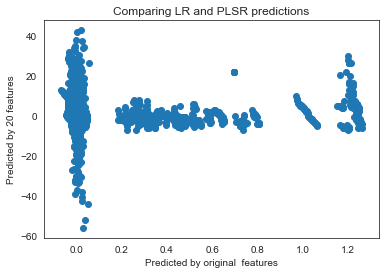

In [5]:
# Prepare data set
X = cc_data.drop('Class', axis=1)
Y = cc_data['Class']

# Fit a linear model with all features.
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, Y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 20 dimensions.
pls1 = PLSRegression(n_components=20)

# Reduce X to R(X) and regress on y.
pls1.fit(X, Y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, Y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original  features')
plt.ylabel('Predicted by 20 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Populating the interactive namespace from numpy and matplotlib


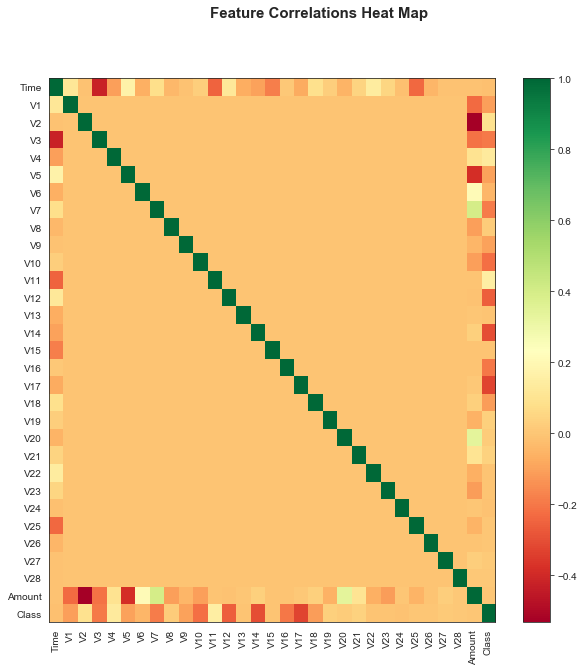

In [6]:
corr = cc_data.corr()

#Plot Correlation Matrix using Matplotlib
%pylab inline
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Feature Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()

In [7]:
# Let's try just time and amount and v2 v5 v3 v10 v11 v12 v14 v15 v16 v17 v18 v25
cc_less = cc_data[['Time','Amount','V2','V3','V5','V10','V11','V12','V14','V15','V16','V17','V18','V25']].copy()

In [8]:
# what is our cross validation score with these features?

rfc = ensemble.RandomForestClassifier(n_estimators=50)
X = cc_less


cross_val_score(rfc, X, Y, cv=10)

array([0.02299698, 0.99884137, 0.99978933, 0.99950844, 0.99929778,
       0.99905197, 0.99975421, 0.99954354, 0.99950843, 0.99929775])

R-squared regression: 0.4477468378749945
R-squared PLSR: 0.44774683787499436


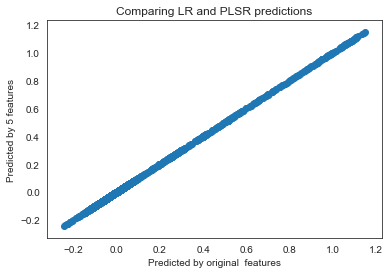

In [9]:
# Still a major anomoly - will PLS be more revealing with fewer features?


# Fit a linear model with all features.
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, Y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 5 dimensions.
pls1 = PLSRegression(n_components=5)

# Reduce X to R(X) and regress on y.
pls1.fit(X, Y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, Y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original  features')
plt.ylabel('Predicted by 5 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Populating the interactive namespace from numpy and matplotlib


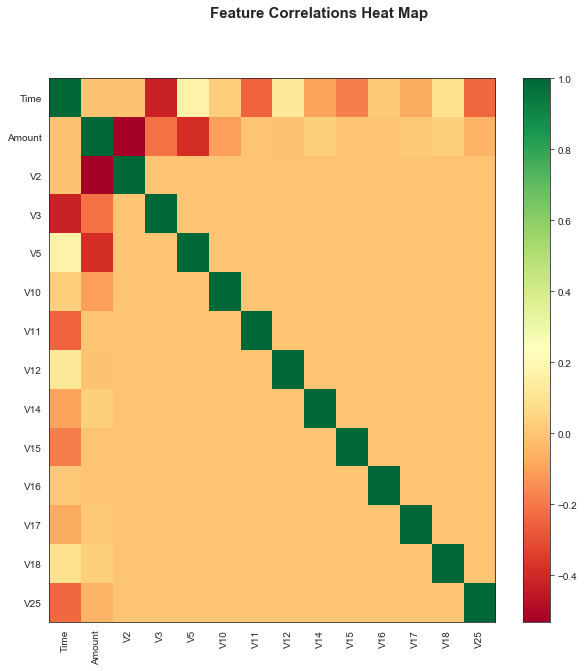

In [10]:
# And, what does a heatmap on fewer features show?
corr = cc_less.corr()

#Plot Correlation Matrix using Matplotlib
%pylab inline
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Feature Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()

In [11]:
# create training and testing vars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit the model
model = rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)


(213605, 14) (213605,)
(71202, 14) (71202,)


In [12]:
# Compare test to true outcomes for fraud detected

pos_pred = predictions[predictions ==1]
print(pos_pred.shape)
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))
unique_elementsy, counts_elementsy = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elementsy, counts_elementsy)))


(110,)
[[    0     1]
 [71092   110]]
[[    0     1]
 [71071   131]]


In [13]:
print('Score:', model.score(X_test, y_test))

Score: 0.9994803516755147
